In [2]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly_resampler import register_plotly_resampler


In [3]:
import importlib
import sys
import pandas as pd
import numpy as np

sys.path.append("../")
import biobss
import os
os.getcwd()
import neurokit2 as nk
sample_data = pd.read_pickle("../sample_data/EDA_Chest.pkl")
sample_data = sample_data.flatten()
decompose = biobss.pipeline.Bio_Process(process_method=biobss.edatools.eda_decompose,method="highpass")

clean=biobss.pipeline.Bio_Process(
    process_method=biobss.edatools.eda_clean,argmap={"sampling_rate":"sampling_rate"},method="neurokit")

normalize = biobss.pipeline.Bio_Process(
    process_method=biobss.preprocess.normalize_signal)
resample = biobss.pipeline.Bio_Process(
    process_method=biobss.preprocess.resample_signal_object,target_sample_rate=700)
signal_features = biobss.pipeline.Feature(name="signal_features", function=biobss.edatools.eda_signalfeatures.get_signal_features, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
stat_features = biobss.pipeline.Feature(name="stat_features", function=biobss.edatools.get_stat_features, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
pipeline = biobss.pipeline.Bio_Pipeline(windowed_process=True,window_size=60,step_size=20)
channel=biobss.pipeline.Bio_Channel(signal=sample_data,name="EDA_Raw",sampling_rate=700)
pipeline.set_input(sample_data,sampling_rate=700,name='EDA_Raw')
pipeline.preprocess_queue.add_process(resample)
pipeline.add_feature_step(signal_features)
pipeline.add_feature_step(stat_features)
pipeline.run_pipeline()

TypeError: _initialize_timestamp() takes 3 positional arguments but 4 were given

In [ ]:
def unify_windows(windows,timestamps,window_size,step_size,sampling_rate):
    if(windows.shape[0]==timestamps.shape[0]):
        raise ValueError("Number of windows and timestamps must be equal")
    if(windows.ndim==1):
        return windows,timestamps
    window_size = int(window_size*sampling_rate)
    step_size = int(step_size*sampling_rate)
    if(len(windows)!=len(timestamps)):
        raise ValueError('windows and timestamps must have the same length')
    
    num_windows = len(windows)
    num_points = num_windows*step_size+(window_size-step_size)
    
    unified_windows = np.zeros(num_points)
    unified_timestamps = np.zeros(num_points)
    unified_windows[:window_size] = windows[0]
    unified_timestamps[:window_size] = timestamps[0]
    
    for i in range(1,num_windows):
        unified_windows[i*step_size:i*step_size+window_size] = windows[i]
        unified_timestamps[i*step_size:i*step_size+window_size] = timestamps[i]
    
    return unified_windows,unified_timestamps    

In [ ]:
pipeline.input['EDA_Raw'].channel

array([5.40046692, 5.40885925, 5.40161133, ..., 7.26280212, 7.26966858,
       7.2681427 ])

In [ ]:
s,t=unify_windows(pipeline.input['EDA_Raw'].channel,pipeline.input['EDA_Raw'].timestamp,60,20,sampling_rate=700)

ValueError: Number of windows and timestamps must be equal

In [ ]:
data=sample_data
ts=biobss.timetools.create_timestamp_signal("s",data.size,0,700)

In [ ]:
biobss.plottools.create_signal_plot_plotly(data,ts,plot_title="EDA Signal",timestamp_resolution="ms",signal_name="EDA")

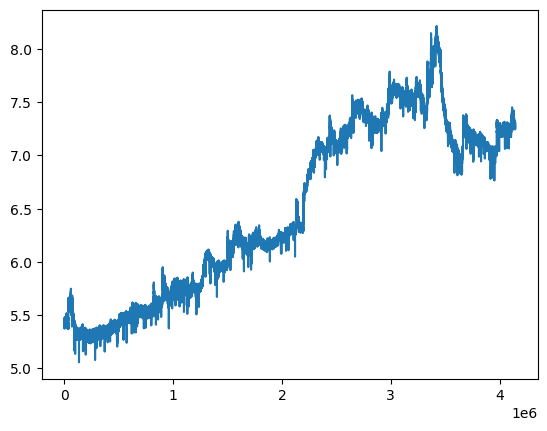

In [5]:
plt.plot(sample_data)